In [15]:
import matplotlib.pyplot as plt
from matplotlib import patches
import numpy as np
from scipy import signal

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # 中文字体设置

In [16]:
# 30
P = [3, -3.98, 1.17, 2.3418, -1.5147]
x = np.linspace(-1, 1.5, 1000)
y = np.polyval(P, x)
p = np.roots(P) # 系统极点

print("极点:")
for pp in p: print(pp)

if np.max(np.abs(p)) > 1:
    print("系统不稳定")
else:
    print("系统稳定")

极点:
(-0.748624499819416+0j)
(0.6996490613883155+0.7128739056214976j)
(0.6996490613883155-0.7128739056214976j)
(0.6759930437094527+0j)
系统稳定


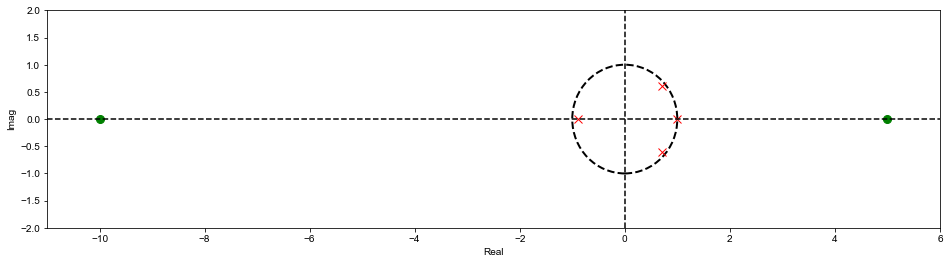

系统稳定


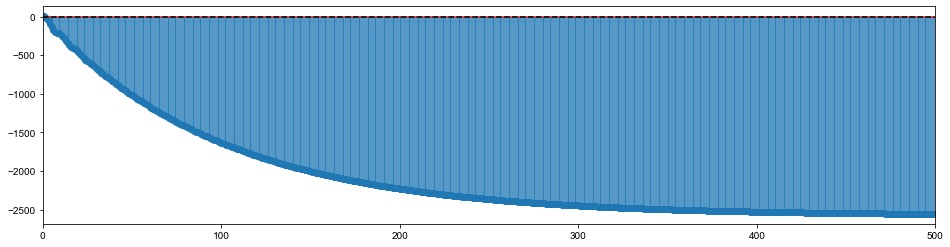

输入单位阶跃序列，系统输出趋近常数，因此系统是稳定的


In [17]:
# 31
A = [2, -2.98, 0.17, 2.3418, -1.5147] # 分母
B = [1, 5, -50] # 分子

# (1)
p = np.roots(A) # 系统极点
z = np.roots(B) # 系统零点

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot()
ax.plot(p.real, p.imag, 'rx', ms=8, label="极点")
ax.plot(z.real, z.imag, 'go', ms=8, label="零点")
ax.axhline(0, color='black', ls="dashed")
ax.axvline(0, color='black', ls="dashed")
circle = patches.Circle((0,0), radius=1, fill=False, lw=2, color='black', ls='dashed')
ax.add_patch(circle)
ax.set_xlim([-11, 6])
ax.set_ylim([-2, 2])
ax.set_xlabel("Real")
ax.set_ylabel("Imag")
plt.show()

if np.max(np.abs(p)) > 1:
    print("系统不稳定")
else:
    print("系统稳定")

# (2)
u = np.ones(500)
y = signal.lfilter(B, A, u)
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot()
ax.stem(np.arange(len(y)), y)
ax.hlines(0, 0, 500, colors='black', ls="dashed")
ax.set_xlim(0, 500)
plt.show()
print("输入单位阶跃序列，系统输出趋近常数，因此系统是稳定的")

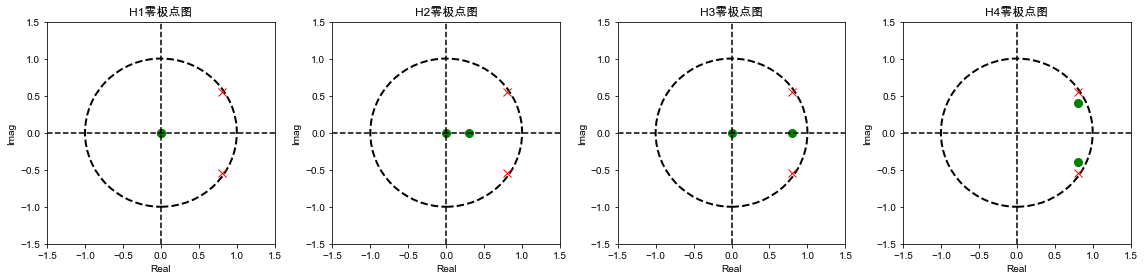

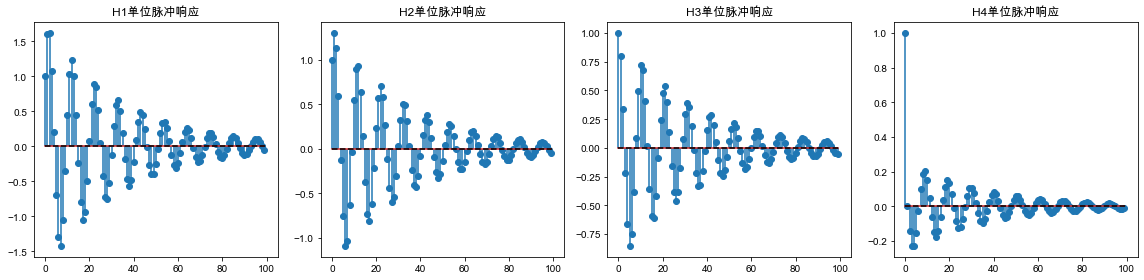

In [23]:
# 32
# H1
H1_A = [1, -1.6, 0.9425] # 分母
H1_B = [1, 0, 0] # 分子
# H2
H2_A = [1, -1.6, 0.9425] # 分母
H2_B = [1, -0.3, 0] # 分子
# H3
H3_A = [1, -1.6, 0.9425] # 分母
H3_B = [1, -0.8, 0] # 分子
# H4
H4_A = [1, -1.6, 0.9425] # 分母
H4_B = [1, -1.6, 0.8] # 分子

H = [(H1_A, H1_B),
     (H2_A, H2_B),
     (H3_A, H3_B),
     (H4_A, H4_B),]

# (1)
fig = plt.figure(figsize=(16, 4))
for i, (A, B) in enumerate(H):
    p = np.roots(A) # 系统极点
    z = np.roots(B) # 系统零点
    ax = fig.add_subplot(1, 4, i+1)
    ax.plot(p.real, p.imag, 'rx', ms=8, label="极点")
    ax.plot(z.real, z.imag, 'go', ms=8, label="零点")
    ax.axhline(0, color='black', ls="dashed")
    ax.axvline(0, color='black', ls="dashed")
    circle = patches.Circle((0,0), radius=1, fill=False, lw=2, color='black', ls='dashed')
    ax.add_patch(circle)
    ax.set_xlim([-1.5, 1.5])
    ax.set_ylim([-1.5, 1.5])
    ax.set_xlabel("Real")
    ax.set_ylabel("Imag")
    ax.set_title(f"H{i+1}零极点图")
plt.tight_layout()
plt.show()

# (2)
delta = np.ones(1)
fig = plt.figure(figsize=(16, 4))
for i, (A, B) in enumerate(H):
    t, y = signal.dimpulse((B, A, 1))
    ax = fig.add_subplot(1, 4, i+1)
    ax.stem(t, np.squeeze(y))
    ax.hlines(0, 0, 100, colors='black', ls="dashed")
    ax.set_title(f"H{i+1}单位脉冲响应")
plt.tight_layout()
plt.show()